# <span style="color:red"><center>Mínimos cuadrados ordinarios<center></span>


<figure> 
<center>
<img src="https://github.com/Jeslome/Proyecto/blob/main/Temas/Imagenes/hd-wallpaper-1867616_1920.jpg?raw=true"  width="800" height="800" align="center"/>
<figcaption> </figcaption>
</center>
</figure>

[Fuente:pixabay](https://pixabay.com/es/photos/astronom%c3%ada-brillante-constelaci%c3%b3n-1867616/)

## <span style="color:blue">Referencias</span>
1. José Alfredo Moscoso, [Libro de Álgebra Matricial](https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html )


## <span style="color:blue">Profesor</span>
1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co

## <span style="color:blue">Autores</span>
1. Natalia Buriticá, nburitica@unal.edu.co
2. Nicolás Romero, niromeros@unal.edu.co
2. Jessica López, jelopezme@unal.edu.co

## <span style="color:blue">Introducción</span>

El método de los Minimos Cuadrados Ordinarios (MCO ó OLS) es un procedimiento matematico que consiste en calcular la recta de regresión lineal que minimiza los residuos, esto quiere decir, minimizar la suma de los residuos al cuadrado, teniendo como residuo la diferencia entre los datos observados y los valores del modelo lineal. Dados un conjunto de pares ordenados ($x_i,y_i$) se busca determinar la ecuacion de la recta $y= ax+b$ que se aproxime lo mas posible a la nube de puntos definida por los pares de los valores muestrales obtenidos. Este modelo de regresion lineal permite efectuar predicciones de una variable aleatoria $Y$ sabiendo los valores de un conjunto de variables $X_1, X_2,… X_n$. A la variable $Y$ la llamamos dependiente, aunque también se la conoce como variable objetivo, endógena, criterio o explicada. Por su parte, las variables $X$ son las variables independientes, conocidas también como predictoras, explicativas, exógenas o regresoras. En otras palabras, Y depende de $X$, donde $Y$ es una variable aleatoria cualquiera pero $X$ no lo es. Lo dicho hasta aqui indica una regresion lineal simple donde se visualiza una unica variable independiente y la otra es depediente. Cuando se considere una regresión multiple se contemplaran tres o mas variables, una de las cuales es la variable dependiente que debe ser estimada con base en los valores de las otras variables que son las independientes.


<figure> 
<center>
<img src="https://github.com/Jeslome/Proyecto/blob/main/Temas/Imagenes/MCO.png?raw=true"  width="400" height="400" align="center"/>
<figcaption> </figcaption>
</center>
</figure>

[Fuente:miprofe](https://miprofe.com/minimos-cuadrados/)

## <span style="color:blue">Nota Histórica</span>


El método de mínimos cuadrados tiene una larga historia que se remonta a los principios del siglo XIX. En Junio de 1801, Zach, un astrónomo que Gauss había conocido dos años antes, publicaba las posiciones orbitales del cuerpo celeste Ceres, un nuevo “pequeño planeta” descubierto por el astrónomo italiano G. Piazzi en ese mismo año. Desafortunadamente, Piazzi sólo había podido observar 9 grados de su órbita antes de que este cuerpo desapareciese tras de el sol. Zach publicó varias predicciones de su posición incluyendo una de Gauss que difería notablemente de las demás. Cuando Ceres fue redescubierto por Zach en Diciembre de 1801 estaba casi exactamente en donde Gauss había predicho.
Aunque todavía no había revelado su método, Gauss había descubierto el método de mínimos cuadrados. En un trabajo brillante logró calcular la órbita de Ceres a partir de un número reducido de observaciones, de hecho, el método de Gauss requiere sólo un mínimo de 3 observaciones y todavía es, en esencia, el utilizado en la actualidad para calcular las órbitas.

<figure> 
<center>
<img src="https://github.com/Jeslome/Proyecto/blob/main/Temas/Imagenes/Orbit%20of%20Ceres.jpg?raw=true"  width="400" height="400" align="center"/>
<figcaption> </figcaption>
</center>
</figure>

[Fuente:astroPPM](https://astroppm.blogspot.com/2010/08/ceres-directions.html)

## <span style="color:blue">Fundamento matemático</span>


### <span style="color:#4CC9F0">Modelo de regresión lineal simple</span>


El problema de recolectar y analizar datos está presente en muchos aspectos de las actividades humanas. Con frecuencia medimos un valor de $y$ para un valor dado de $x$ y luego localizamos los puntos ($x$, $y$) en una gráfica. Aprovechamos la gráfica resultante para establecer una relación entre las variables x y y que luego sirva para predecir nuevos valores de $y$ para valores dados de $x$. A continuación vemos una grafica de lo dicho: 

In [60]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np

In [54]:
Producto = {'Beta usada (gramo/)': [3,4,5,6,7,8,9,10,11,12],
               'presente': [4.5, 5.5, 5.7, 6.6,7.0,7.7,8.5,8.7,9.5,9.7]}
df

,usada,presente
0,3,4.5
1,4,5.5
2,5,5.7
3,6,6.6
4,7,7.0
5,8,7.7
6,9,8.5
7,10,8.7
8,11,9.5
9,12,9.7


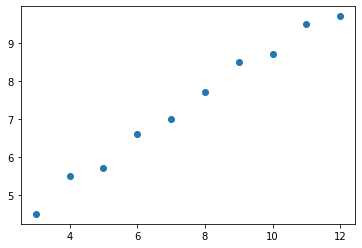

In [67]:
import matplotlib.pyplot as plt
x=[3,4,5,6,7,8,9,10,11,12]
y=[4.5, 5.5, 5.7, 6.6,7.0,7.7,8.5,8.7,9.5,9.7]
plt.scatter(x,y)
plt.show()

Suponga que la relación entre la cantidad de alfa utilizada y la cantidad de beta presente está dada por una ecuación lineal, de modo que la gráfica sea una línea recta. En
vista de lo anterior, no sería razonable unir los puntos trazando una curva que pase por
todos ellos. Además, los datos tienen una naturaleza probabilística, es decir, no son deterministas, en el sentido de que si repitiéramos el experimento encontraríamos valores
ligeramente distintos de beta para los mismos valores de alfa, pues todas las mediciones están sujetas a errores experimentales. De esta manera, los puntos graficados no están, necesariamente, sobre una línea recta. A continuación aplicamos el método de
mínimos cuadrados para obtener la línea recta que “mejor se ajusta” a los datos proporcionados. Esta línea es la recta de mínimos cuadrados.
Suponga que se nos han dado n puntos ($x_1$,$y_1$), ($x_2$,$y_2$), . . . , ($x_n$, $y_n$), donde por lo menos dos de las $x_i$ son distintas. 

Estamos interesados en determinar la recta que mejor se ajusta a los datos:

$$\widehat{y} = \ \widehat{\alpha} + \widehat{\beta}x$$ 

que “mejor se ajusta a los datos”. Si los puntos ($x_1$,$y_1$), ($x_2$,$y_2$), . . . , ($x_n$, $y_n$)   estuvieran exactamente sobre la recta de mínimos cuadrados, tendríamos que:

$$\widehat{y_i} = \ \widehat{\alpha} + \widehat{\beta}x_i$$

Predecir el valor de la variable Y a partir del comportamiento de la variable X, a nivel exacto es imposible, puesto que influyen diversos factores desconocidos que alteran el valor de cada variable. Como algunos de estos puntos no están necesariamente sobre la recta, así pues la recta está dada por:

   $$\widehat{y_i} = \ \widehat{\alpha} + \widehat{\beta}x_i+ e_i$$

Donde: 


* $\widehat{y_i}$ es el valor de la variable respuesta en el $i$-ésimo ensayo.


* $\widehat{\alpha},\widehat{\beta}$ Son los coeficientes (o parámetros) de regresión que corresponden al intercepto y a la pendiente, respectivamente.


* $x_i$ Es un valor conocido, el valor de la variable independiente en el $i$-ésimo ensayo.

* $e_i$ es el error del modelo también conocido como perturbación. Se parte del supuesto de que siguiendo una distribución normal con media cero y varianza $\sigma^2$ constante y desconocida.

### <span style="color:#4CC9F0">Mínimos Cuadrados Ordinarios (MCO)</span>



Sean $\left( x_{i},y_{i} \right)\ldots\left( x_{n},y_{n} \right)$ variables cuantitativas, se propone un modelo de regresión lineal simple para tratar de entender como la variable X afecta a la variable Y.

Se busca la recta $\widehat{y} = \ \widehat{\alpha} + \widehat{\beta}x$ que mejor se ajusta al conjunto de datos.

De lo que se dio cuenta Gauss era que si sumaba todos los errores que estaban por encima de la recta con los que estaban por debajo se iban a cancelar. Cada error está representado por:
$$e_i=y_i-\widehat{y_i}$$
Donde $\widehat{y_i}$ representa  la recta entonces: 
$$\widehat{y_i}= \widehat{\alpha} + \widehat{\beta}$$

Entonces si la suma de los $e_1$ son  iguales a 0 y nosotros promediamos esos errores tendriamos que:
$$\frac{1}{n}\ \sum_{i=1}^{n}{e_{i} = 0\times\frac{1}{n}= 0}$$

Donde
$$e_i \~ N(0,\sigma^2), \forall{i}$$

Hace falta encontrar una recta que minimice los residuos al cuadrado.

$$\Phi\left( \widehat{\alpha},\widehat{\beta} \right) = \ \sum_{i = 1}^{n}e_{i}^{2} = \ \sum_{i = 1}^{n}\left( y_{i} - {\widehat{y}}_{i} \right)^{2} = \sum_{i = 1}^{n}\left( y_{i} - \widehat{\alpha} - \widehat{\beta}x_{i} \right)^{2}$$

Se tiene que enontrar $\widehat{\alpha}\text{ y }\widehat{\beta}$, tal que
$\Phi\left( \widehat{\alpha},\widehat{\beta} \right)$ es mínima.

$$\frac{\partial\Phi}{\partial\widehat{\alpha}} = 0\ \frac{\partial\Phi}{\partial\widehat{\beta}} = 0$$


$$\frac{\partial\Phi}{\partial\widehat{\alpha}} = \sum_{i = 1}^{n}{2\left( y_{i} - \widehat{\alpha} - \widehat{\beta}x_{i} \right)\left( - 1 \right) = 0 \Longleftrightarrow \ \sum_{i = 1}^{n}{\left( y_{i} - \widehat{\alpha} - \widehat{\beta}x_{i} \right) = 0 \Longleftrightarrow \ \sum_{}^{}{y_{i} - n}}}\widehat{\alpha} - \widehat{\beta}\sum_{}^{}{x_{i} = 0} \Longleftrightarrow \frac{1}{n}\sum_{}^{}{y_{i} - \widehat{\alpha} - \widehat{\beta}}\frac{1}{n}\ \sum_{}^{}{x_{i} = 0} \Longleftrightarrow \overline{Y} - \widehat{\alpha} - \widehat{\beta}\overline{X} = 0 \Longrightarrow \widehat{\mathbf{\alpha}}\mathbf{=}\overline{\mathbf{Y}}\mathbf{-}\widehat{\mathbf{\beta}}\overline{\mathbf{X}}$$

$$\frac{\partial\Phi}{\partial\widehat{\beta}} = \sum_{i = 1}^{n}{2\left( y_{i} - \widehat{\alpha} - \widehat{\beta}x_{i} \right)\left( x_{i} \right) =}0 \Longleftrightarrow \sum_{}^{}{\left( y_{i} - \widehat{\alpha} - \widehat{\beta}x_{i} \right)\left( x_{i} \right) = 0}\  \Longleftrightarrow \sum_{}^{}y_{i}x_{i} - \widehat{\alpha}\sum_{}^{}x_{i} - \widehat{\beta}\sum_{}^{}{x_{i}^{2} = 0} \Longleftrightarrow \frac{1}{n}\sum_{}^{}{y_{i}x_{i} -}\widehat{\alpha}\overline{X} - \widehat{\beta}\ \frac{1}{n}\sum_{}^{}{x_{i}^{2} = 0} \Longleftrightarrow \frac{1}{n}\sum_{}^{}{x_{i}y_{i}} - \left( \overline{Y} - \widehat{\beta}\overline{X} \right)\overline{X} - \widehat{\beta}\frac{1}{n}\sum_{}^{}{x_{i}^{2} = 0}\  \Longleftrightarrow \frac{1}{n}\sum_{}^{}{(x_{i}y_{i}} - \vec{X}\overline{Y}) - \ \widehat{\beta}(\frac{1}{n}\sum_{}^{}x_{i}^{2} - {\overline{X}}^{2}) = 0 
\Longleftrightarrow S_{\text{xy}} - \widehat{\beta}S_{x}^{2}\ \  \Longrightarrow \widehat{\beta} = \frac{S_{\text{xy}}}{S_{x}^{2}}$$  

Dado que teniamos que
   $$\widehat{y} = \ \widehat{\alpha} + \widehat{\beta}x \Longrightarrow \widehat{\alpha}=\widehat{y}-\widehat{\beta}x \Longrightarrow \widehat{\alpha}=\widehat{y}-\frac{S_{\text{xy}}}{S_{x}^{2}}x$$



### <span style="color:#4CC9F0">Modelo lineal general (múltiple)</span>


El conjunto de n ecuaciones simultaneas de la recta del modelo lineal es de la forma:
$${y_1} = \beta_0 + \beta_1x_1 + e_1$$     
$${y_2} = \beta_0 + \beta_1x_2 + e_2$$
$$\vdots$$
$$y_n = \beta_0 + \beta_1x_n + e_n$$     


Que puede escribirse en forma matricial como sigue:

$$
\left(
\begin{array}{ll}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{array}
\right)
=
\left(
\begin{array}{ll}
1 & x_1 \\
1 & x_2\\
\vdots & \vdots \\
1 & x_n
\end{array}
\right)
*
\left(
\begin{array}{ll}
\mbox{β0}\\
\mbox{β1}
\end{array}
\right)
+
\left(
\begin{array}{ll}
e_1\\
e_2\\
\vdots \\
e_n
\end{array}
\right)
$$


es decir:

$$\vec{Y}= X \vec{β} + \vec{e}$$


Esta expresión nos permite formular el modelo lineal general.
donde:

* $\vec{Y}$ : Es un vector columna de tamaño n × 1, de observaciones sobre la
variable dependiente Y.
* $X$ : Es una matriz de tamaño n × p, p ≤ n, de cantidades conocidas
fijas, donde la primera columna es de unos y tiene rango igual a
k ≤ p.
* $\vec{β}$ : Es un vector columna de tamaño p × 1, de parámetros desconocidos
β0, β1,...,βp − 1.
* $\vec{e}$ : Es un vector aleatorio o perturbado de tamaño n × 1.

Se dice que es un modelo lineal general. Este modelo es de rango completo
si el rango de X es igual a p, el cual podemos escribir como:
$$y_i= \sum_{j=0}^{p-1} \beta_jx_{ij} + e_i $$


### <span style="color:violet">Forma operativa</span>


Como ya se ha mencionado anteriormente, este método consiste en determinar los valores de los parametros $\beta_j$ de tal manera que la suma de cuadrados del error (SCE) sea mínima, es decir, se minimiza:

$$SCE=\sum_{i = 1}^{n}e_{i}^{2}= \vec{e}^t\vec{e}=(\vec{y}-\vec{\beta}X)^t(\vec{y}-\vec{\beta}X)\Longleftrightarrow \vec{y}^t\vec{y}- \vec{y}^tX\vec{\beta}-\vec{\beta}^tX^t\vec{y}+(\vec{\beta}^t(X^tX)\vec{\beta})$$

$$\frac{\partial(\vec{e}^t\vec{e})}{\partial\vec{\beta}}=0\Longleftrightarrow-(\vec{y}^tX)^t-X^t\vec{y}+X^tX\vec{\beta}+(\vec{\beta}^tX^tX)^t=0\Longleftrightarrow-X^t\vec{y}-X^t\vec{y}+X^tX\vec{\beta}+(X^tX)^t\vec{\beta}=0\Longleftrightarrow X^tX\vec{\beta}=X^t\vec{y}$$

Por lo tanto:
$$\vec{\beta}=(X^tX)^{-1}X^t\vec{y}=C\vec{y}$$

### <span style="color:#4CC9F0">Implementación en Python del método de minimos cuadrados ordinarios</span>

### <span style="color:violet">Dataset</span>

[]

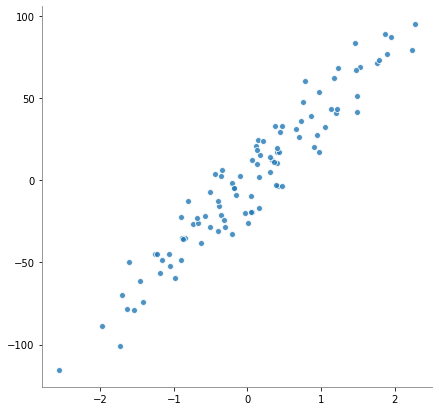

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y_true = make_regression(
    n_samples=100,
    n_features=1,
    n_informative=1,
    #
    # Intecepto
    bias=0.0,
    #
    # numero de vectores singulares para explicar
    # los datos
    effective_rank=None,
    #
    # importancia relativa de las colas
    tail_strength=0.9,
    noise=12.0,
    shuffle=False,
    coef=False,
    random_state=0,
)

plt.figure(figsize=(7, 7))
plt.scatter(X, y_true, color="tab:blue", alpha=0.8, edgecolors="white")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.plot()

In [70]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression(
    #
    # Ajusta el intercepto?
    fit_intercept=True,
    #
    # Normaliza los datos?
    # Se ignora si fit_intercept=True.
    normalize=False,
)

linearRegression.fit(X, y_true)

display(
    linearRegression.coef_,
    linearRegression.intercept_,
    linearRegression.score(X, y_true),
)

array([42.66621538])

-0.9770181924368713

0.9183527010047458

In [71]:
#
# Recuperación de los parámetros con que fue
# especificado el estimador
#
linearRegression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

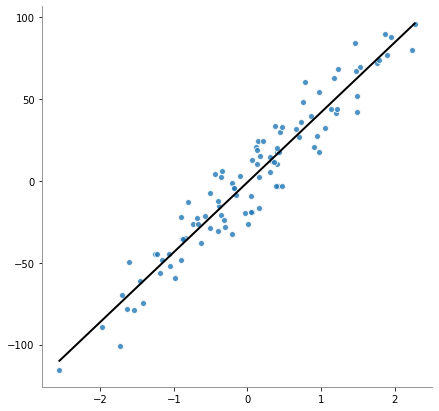

In [72]:
import numpy as np

line_X = np.linspace(X.min(), X.max())[:, np.newaxis]
y_pred = linearRegression.predict(line_X)

plt.figure(figsize=(7, 7))

plt.scatter(X, y_true, color="tab:blue", alpha=0.8, edgecolors="white")
plt.plot(line_X, y_pred, "k", linewidth=2)

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()